<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

---

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.


### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [2]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples.

In [3]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [4]:
df.head()

,col1,col2,col3,col4
a,-0.825714,-0.306915,0.117230,0.280404
b,0.597768,-0.891946,0.607900,-0.901157
c,-0.262405,0.411033,1.137622,1.597665
d,1.458325,-0.541925,-0.025717,0.101757
e,2.393816,-0.295424,1.194044,-1.001540


### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](../../assets/images/chart_suggestions.png)

### Load in data sets for visualization examples.



###  We'll be using three datasets: 

* `boston_housing_data.csv`, an 'iconic' dataset of house prices in Boston. The data dictionary which explains variable names, can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

* `drinks.csv`, a dataset compiled by FiveThirtyEight for this article on alcohol consumption: https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/

* `ufo.csv`, a dataset compiled by the National UFO Reporting Centre on UFO sightings: https://www.kaggle.com/NUFORC/ufo-sightings

In [5]:
# Read in the Boston housing data.
housing_csv = 'data/boston.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [6]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

In [7]:
# Count the number of ufo reports each year (and sort by year).
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [8]:
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

 Use code from the cell above together with ``.plot()`` to generate a line plot of sightings over time. The result should look like this:

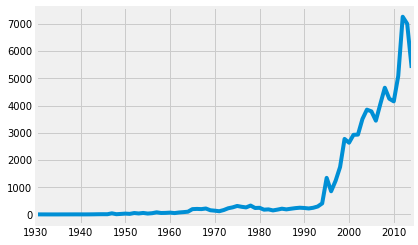

In [9]:
ufo.Year.value_counts().sort_index().plot();


### Bar charts: showing counts for categorical variables

In [11]:
drinks.head(20)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [12]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!
#e.g. drinks.continent.value_counts().plot()

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.

**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

In [13]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

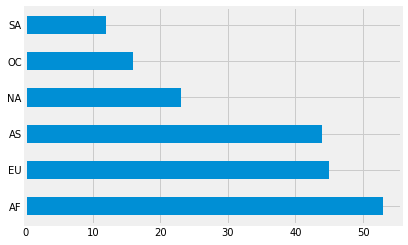

In [14]:
drinks.continent.value_counts().plot(kind='barh');

### Line Plot With a `DataFrame`

In [15]:
df

,col1,col2,col3,col4
a,-0.825714,-0.306915,0.117230,0.280404
b,0.597768,-0.891946,0.607900,-0.901157
c,-0.262405,0.411033,1.137622,1.597665
d,1.458325,-0.541925,-0.025717,0.101757
e,2.393816,-0.295424,1.194044,-1.001540
f,-0.499146,0.806148,1.306592,2.306740
g,-0.818470,-0.443042,-0.207137,-0.585521
h,0.220141,0.594305,-0.914314,-1.151877
i,-0.261097,-0.114218,-0.071989,-0.965167
j,-0.372492,0.469355,-0.559582,-0.306507


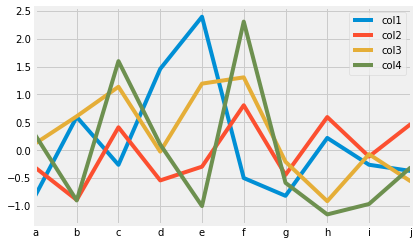

In [16]:
df.plot();

### How to change the size of a plot

Use the figsize parameter to change the size of the plot to 15 "inches" (width) by 8 "inches" (height). The result should look like this:

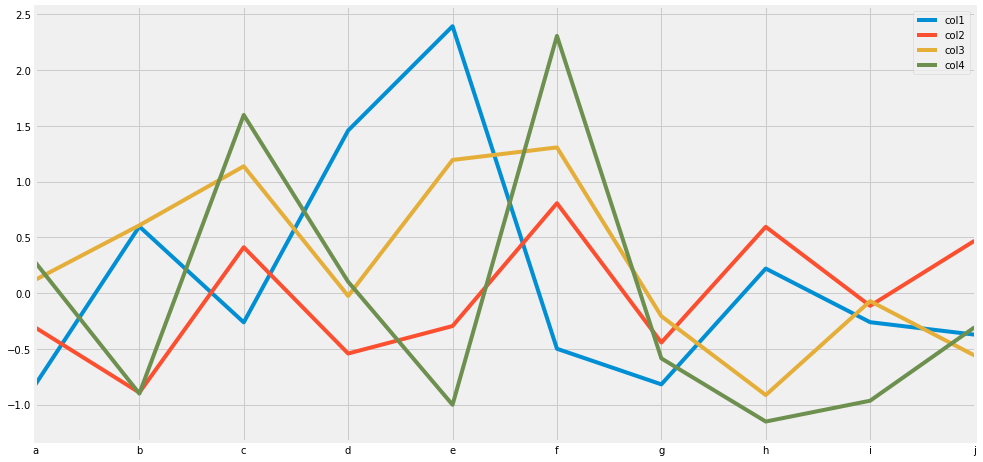

In [17]:
df.plot(figsize=(15, 8));

### How to change the color of a plot

Plot `col1` of `df` against its index. Use the ``color`` (American English- sorry!) to change the colour of the line to `crimson`. The result should look like this:

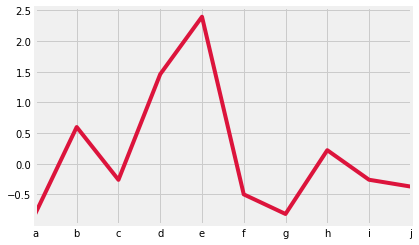

In [18]:
df.col1.plot(color='crimson');

### How to change the style of individual lines

Plot both `col1` and `col4` of `df` against the index on the same axes. Use the `style` parameter to change the appearance of both plots to match the example below. Hint: `:` denotes dotted line, `v` denotes triangle marker, `r` denotes red and `b` blue. The `figsize` should be 15 by 7.

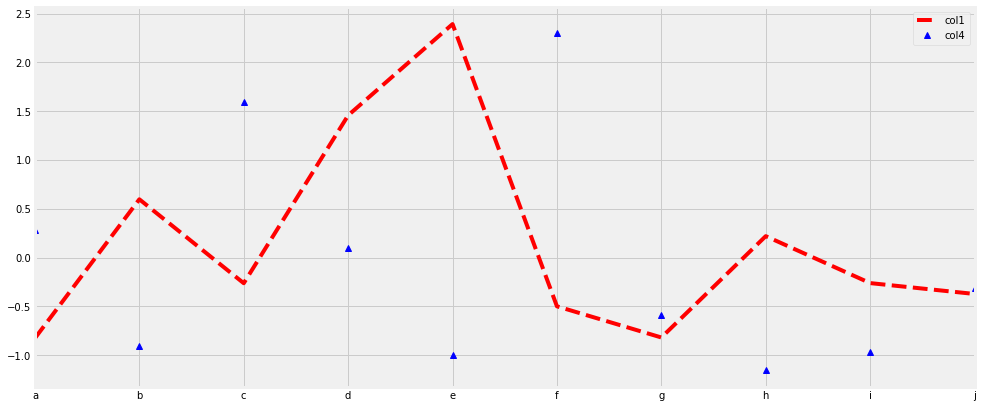

In [19]:
df[["col1","col4"]].plot(style={"col1" : "r--", "col4" : "b^"},figsize=(15,7));

In [20]:
#pd.DataFrame.plot?
#df.col4.plot(figsize=(15, 7), style='r--');

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 
- Check the description of the data here:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


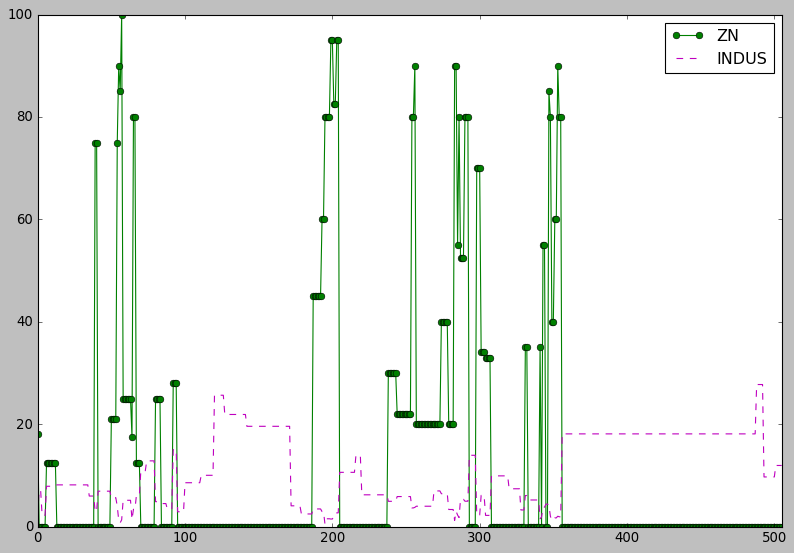

In [24]:
# To see what styles are available use:
#plt.style.available
plt.style.use('classic')
housing[['ZN', 'INDUS']].plot(figsize=(12, 8), style=['go-', 'm--']);

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

Get the value counts for `drinks` in each continent, and plot as a bar chart.

In [25]:
drinks.head()
#drinks.continent.value_counts()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


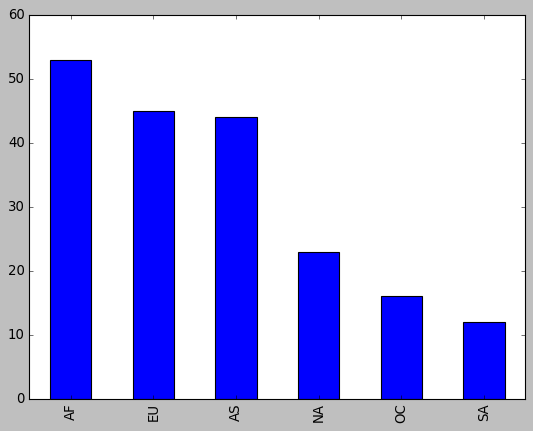

In [26]:
drinks.continent.value_counts().plot(kind='bar');

Calculate the mean alcohol consumption per continent using `groupby` and `mean`.

In [27]:
#You don't need to include the other named columns as 'mean' function automatically calculates all numeric columns
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


Visualise this breakdown by continent using a bar chart.

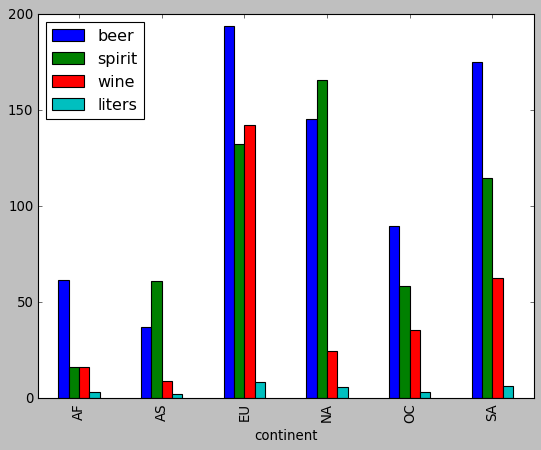

In [28]:
#type(drinks.groupby('continent').mean())
drinks.groupby('continent').mean().plot(kind='bar');

Sort the continent x-axis by the beer column and re-generate the plot. 

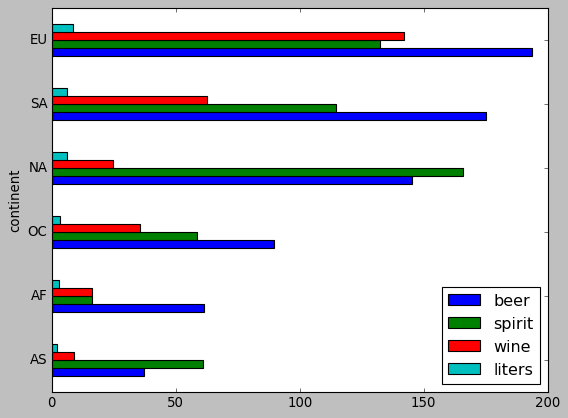

In [29]:
drinks.groupby('continent').mean().sort_values('beer').plot(kind='barh');

Generate a stacked bar plot, sorted (with the litres comparison removed). 

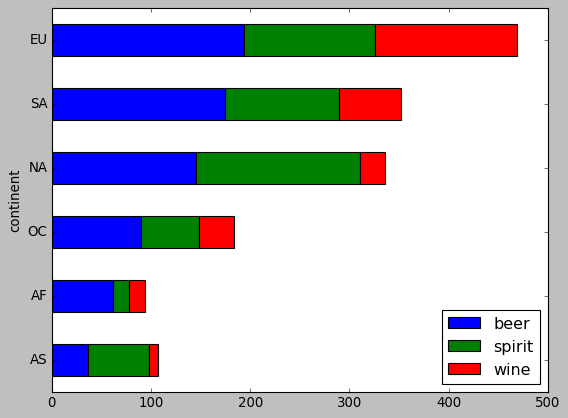

In [30]:
drinks.groupby('continent').mean().drop('liters', axis=1).sort_values('beer').plot(kind='barh', stacked=True);


### Using a `DataFrame` and Matplotlib commands, we can get fancy with our random data.

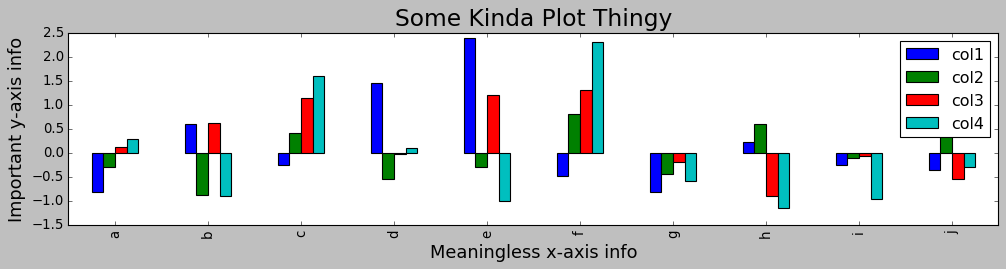

In [31]:
ax = df.plot(kind='bar', figsize=(15,3));

# Set the title - why store float value in keyword argument 'y' ??? Data to plot along y-axis
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01);

# Move the legend (1 is upper-right corner).
ax.legend(loc=1);

# y-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# x-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16);

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

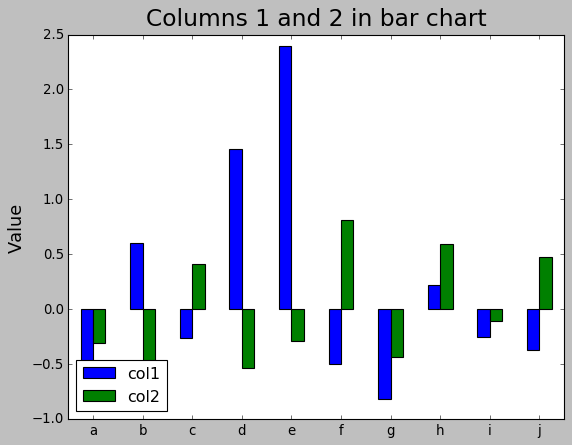

In [32]:
#How to access information on current axes
#plt.gca()

ax1 = df[['col1', 'col2']].plot.bar(rot=0);

# Set the title - why store float value in keyword argument 'y' ??? Data to plot along y-axis
ax1.set_title('Columns 1 and 2 in bar chart', fontsize=21, y=1.01);

# Move the legend (3 is lower-left corner).
ax1.legend(loc=3);

# y-axis labels
ax1.set_ylabel('Value', fontsize=16);

# x-axis labels
ax.set_xlabel('Letter index', fontsize=16);

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

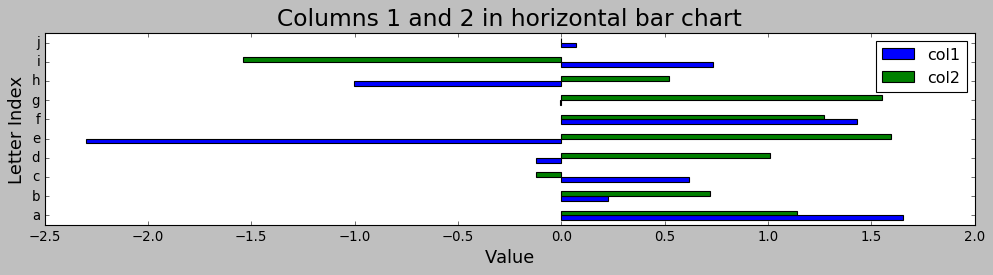

In [30]:
ax3 = df[['col1', 'col2']].plot(kind='barh', figsize=(15,3));

# Set the title - why store float value in keyword argument 'y' ??? Data to plot along y-axis
ax3.set_title('Columns 1 and 2 in horizontal bar chart', fontsize=21, y=1.01);

# Move the legend.
ax3.legend(loc=1);

# y-axis labels
ax3.set_ylabel('Letter Index', fontsize=16);

# x-axis labels
ax3.set_xlabel('Value', fontsize=16);

### Stacked works on horizontal bar charts.

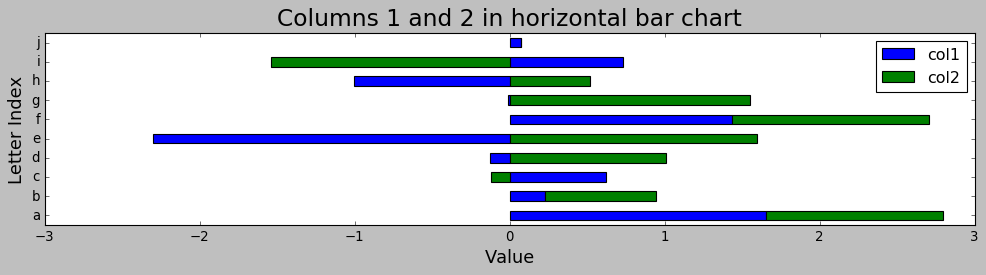

In [31]:
ax3 = df[['col1', 'col2']].plot(kind='barh', figsize=(15,3), stacked=True);

# Set the title - why store float value in keyword argument 'y' ??? Data to plot along y-axis
ax3.set_title('Columns 1 and 2 in horizontal bar chart', fontsize=21, y=1.01);

# Move the legend.
ax3.legend(loc=1);

# y-axis labels
ax3.set_ylabel('Letter Index', fontsize=16);

# x-axis labels
ax3.set_xlabel('Value', fontsize=16);

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [33]:
# Sort the beer column and mentally split it into three groups.
#beer (min=, max=376) split into 3 groups of 126
drinks['beer'].sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

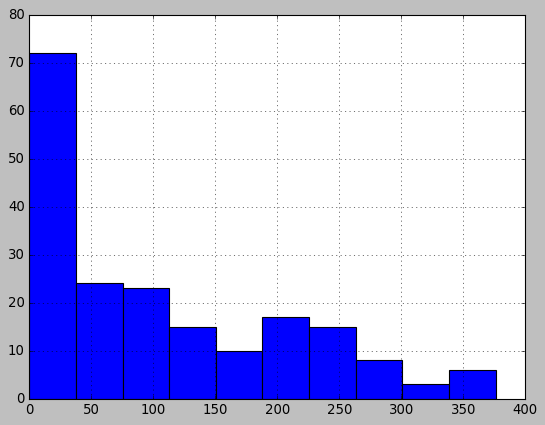

In [35]:
drinks['beer'].sort_values().hist();

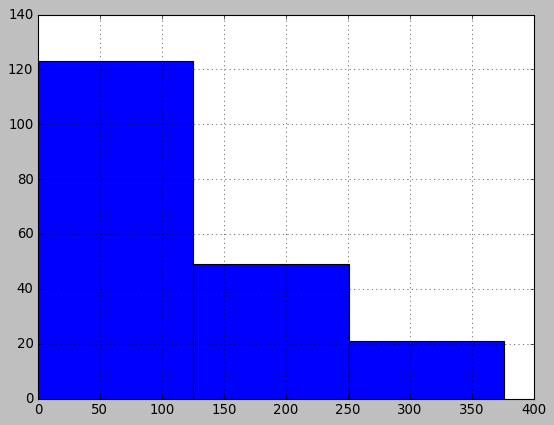

In [36]:
# Compare the above with histogram.
# Servings are equally divided into 3 groups: 1-125 (~119), 125-250 (~59), and 250-376 (~16)?
drinks['beer'].sort_values().hist(bins=3);

Alter the histogram so there are 20 bins in the data. Add labels to the axes 

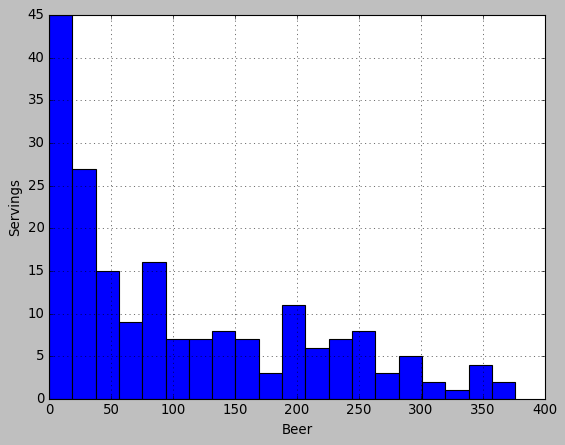

In [38]:
drinks['beer'].sort_values().hist(bins=20)
plt.xlabel('Beer');
plt.ylabel('Servings');

Use the density option to create a smoothed version of the histogram. Limit the range of the x axis from 0-500 using the xlim option.

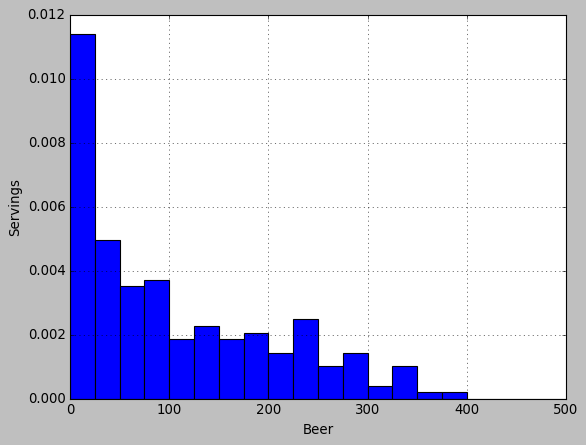

In [40]:
#density parameter normalizes y-count to form a probability density (likelihood of falling in that bin)
drinks['beer'].sort_values().hist(bins=20, range=[0, 500], density=True)
plt.xlabel('Beer');
plt.ylabel('Servings');

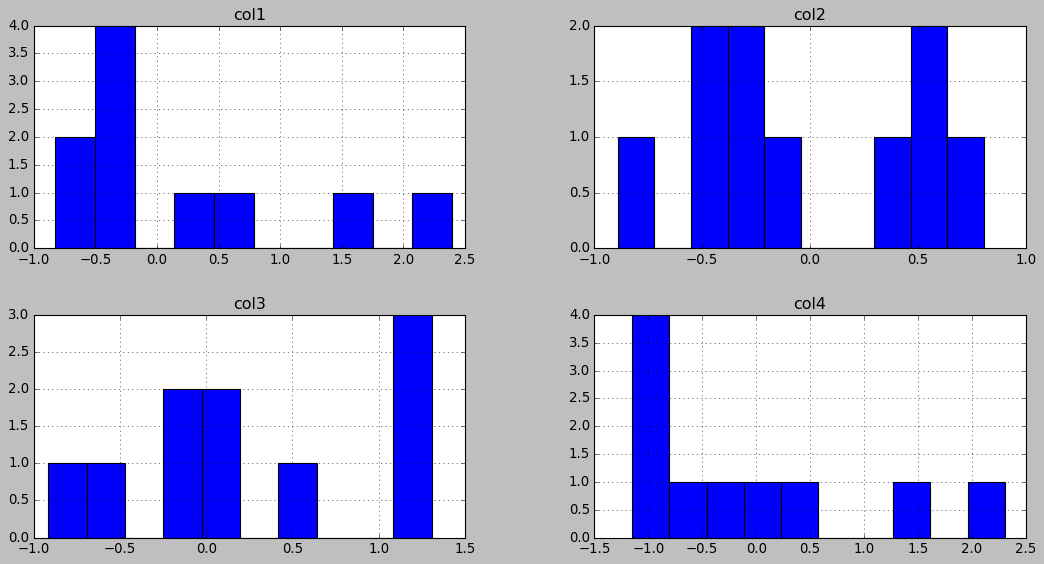

In [46]:
# Making histograms of DataFrames — histogram of random data

#df.min()
# How to make all columns plot on single graph
#df.plot(kind='hist', fontsize=10, bins=20);

# How to make each column display on its own graph
df.hist(figsize=(16, 8));
#plt.xticks(fontsize=9); #only alters fontsize on last image???

### Single Histogram
#### We can generate a histogram of a normal distribution with 5000 samples as shown below.

In [47]:
norm = np.random.standard_normal(5000)

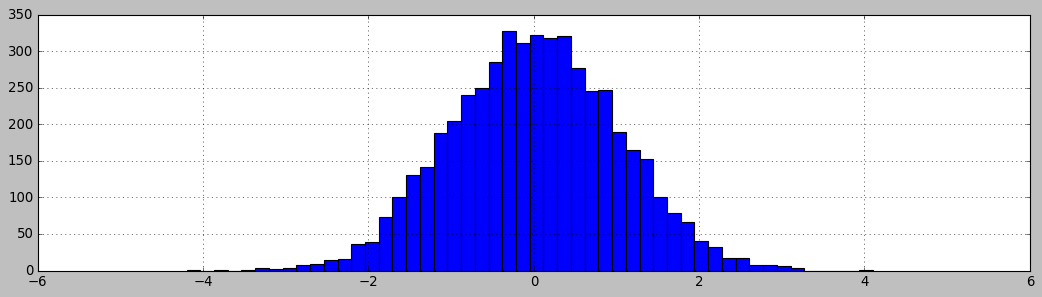

In [48]:
pd.Series(norm).hist(figsize=(16,4), bins=50);

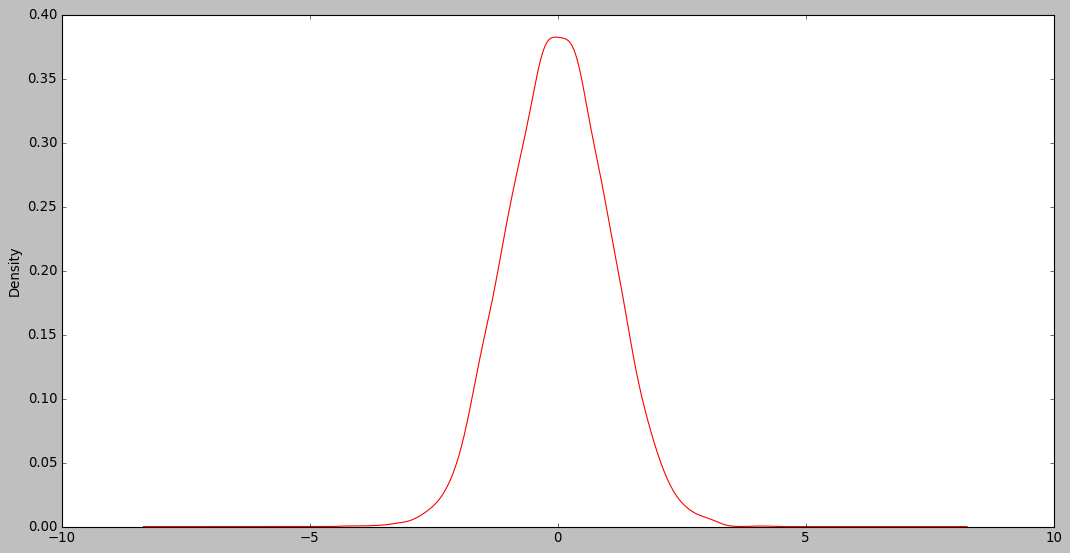

In [49]:
pd.Series(norm).plot(kind="density", figsize=(16,8), color=("red"));

### Another bins example: Sometimes the binning makes the data look different or misleading.

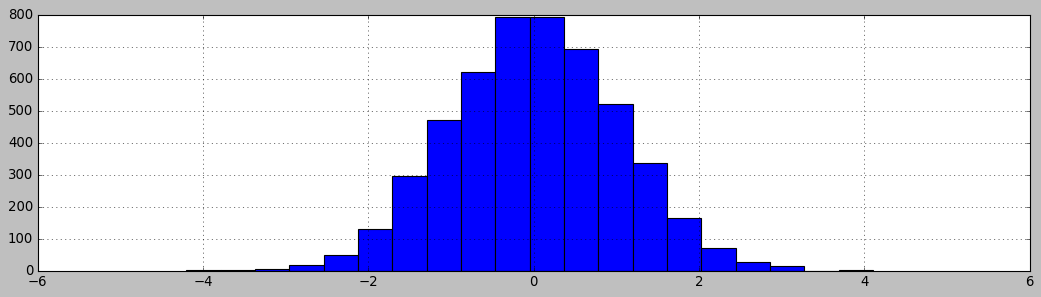

In [50]:
#See highest bars...
pd.Series(norm).hist(figsize=(16,4), bins=20);

### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

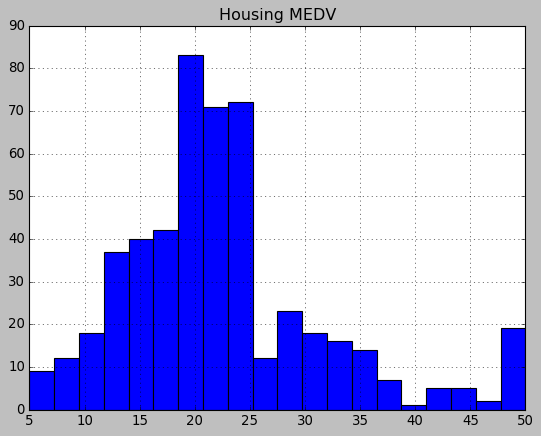

In [51]:
#housing['MEDV'].hist(bins=20);
ax = housing['MEDV'].hist(bins=20)
ax.set_title('Housing MEDV');

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

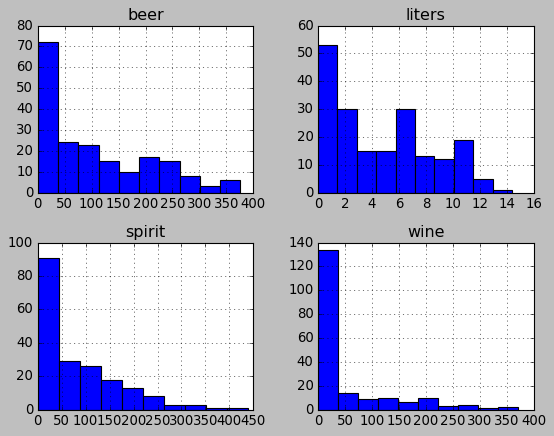

In [54]:
# Reminder: Overall histogram of drinks servings
# If you use plot(kind='hist') outputs one histogram with stacked columns of different colours
drinks.hist();

 Histogram of beer servings grouped by continent -- how might these graphs be misleading?

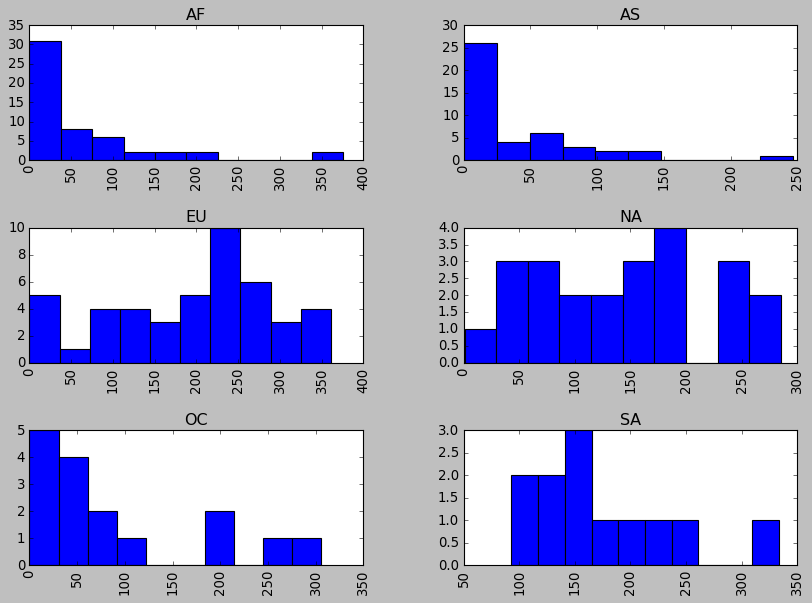

In [58]:
# Grouping-by outputs overlapping columns - cannot read data accurately
#drinks.groupby('continent')['beer'].hist()

drinks.hist(column='beer', by='continent', figsize=(12, 9));

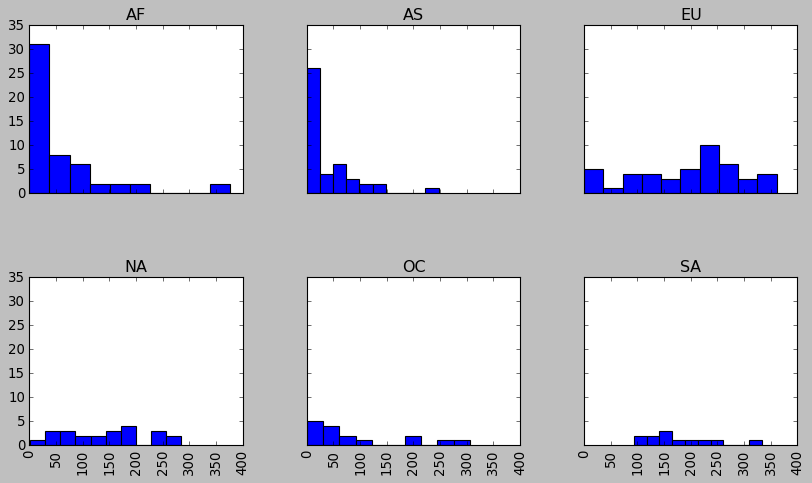

In [65]:
# Share the x- and y-axes. Can only use sharex and sharey in plot()
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, figsize=(12, 7), layout=(2, 3));
#i.e. 2 rows and 3 columns

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1
https://en.wikipedia.org/wiki/Interquartile_range

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

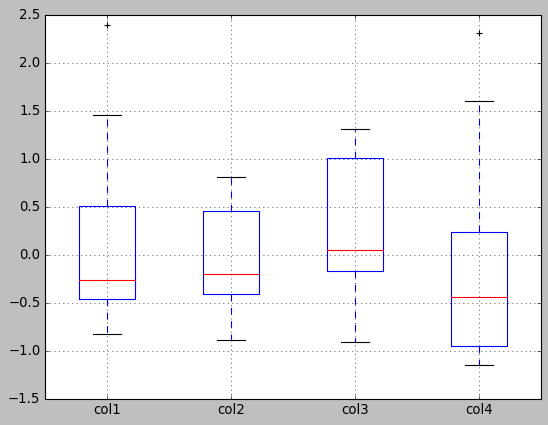

In [66]:
df.boxplot();

### Let's see how box plots are generated so we can best interpret them.

In [70]:
# Sort the spirit column.
#drinks.sort_values(by='spirit')
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [73]:
# One boxplot will be done per value of columns in 'by'
#drinks.boxplot(by='spirit');
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

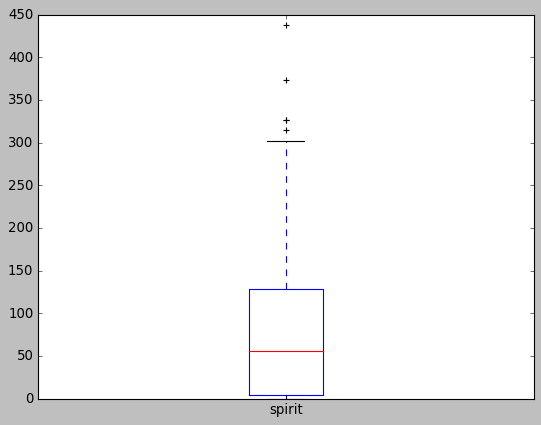

In [76]:
# Show "five-number summary" for spirit 
# Compare with plot - 2nd instruction is clearer

#drinks.boxplot('spirit');
drinks.spirit.plot(kind='box');

 Create a box plot for beer, spirits and wine on a single set of axes.

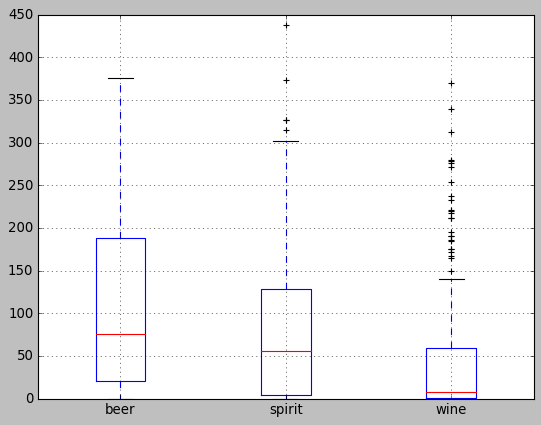

In [77]:
drinks.boxplot(['beer', 'spirit', 'wine']);

### How to use a box plot to preview the distributions in the housing data

Generate a boxplot to view distributions of all variables in the housing dataset.

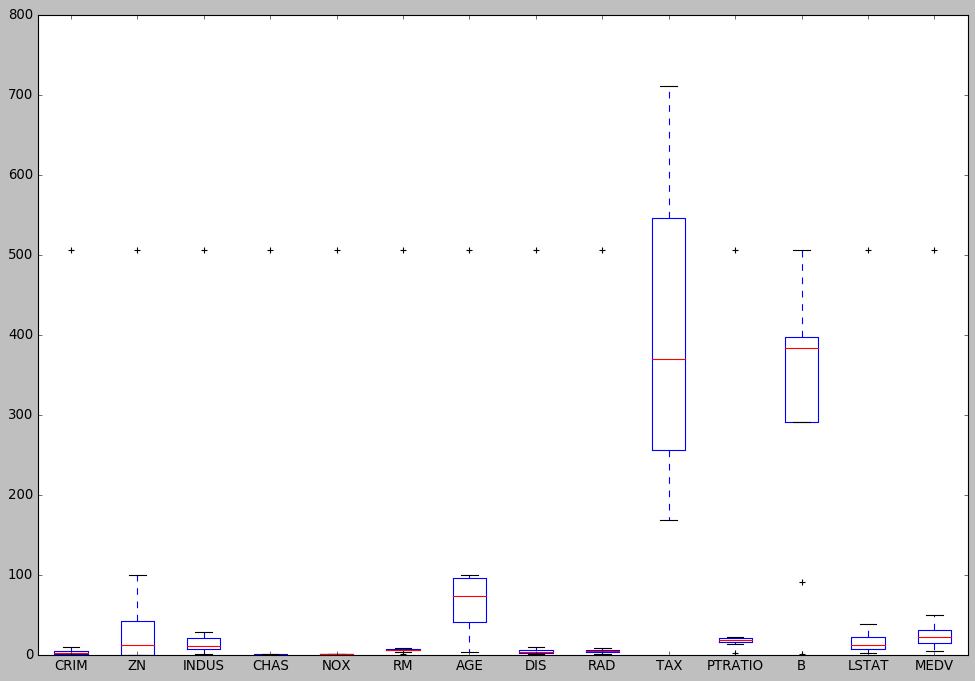

In [80]:
#housing.describe().boxplot(figsize=(15, 10));
housing.describe().plot(kind='box', figsize=(15, 10));

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

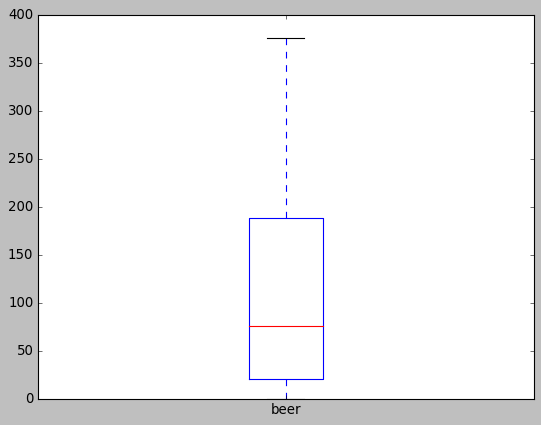

In [82]:
# Reminder: box plot of beer servings
#drinks.boxplot('beer');
drinks.beer.plot(kind='box');

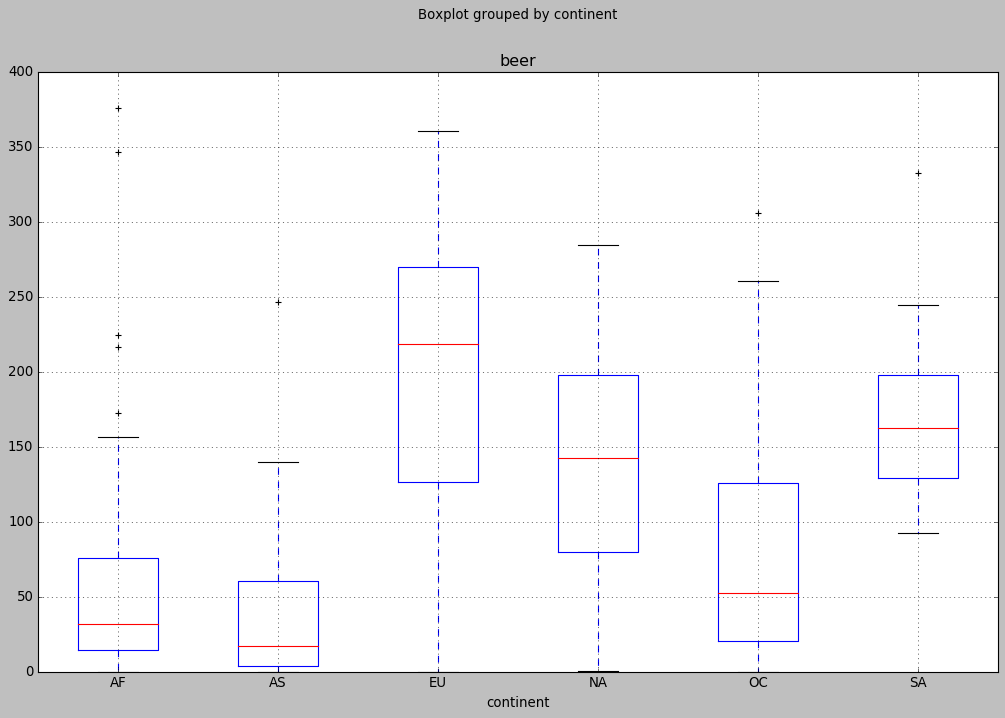

In [84]:
# Box plot of beer servings grouped by continent
#drinks.groupby('continent').boxplot('beer', figsize=(15, 7));  YUCK!
drinks.sort_values("beer").boxplot(column='beer', by='continent',figsize=(15,10));

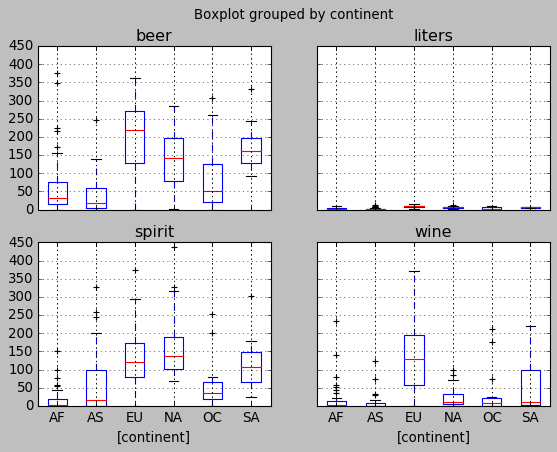

In [88]:
# Box plot of all numeric columns grouped by continent - both instructions work but are layed out differently

#drinks.groupby('continent').boxplot(figsize=(16, 9));
drinks.boxplot(by='continent');

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [90]:
# Select the beer and wine columns and sort by beer.
drinks[['beer', 'wine']].sort_values('beer')

,beer,wine
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0
...,...,...
135,343,56
65,346,175
62,347,59
45,361,134


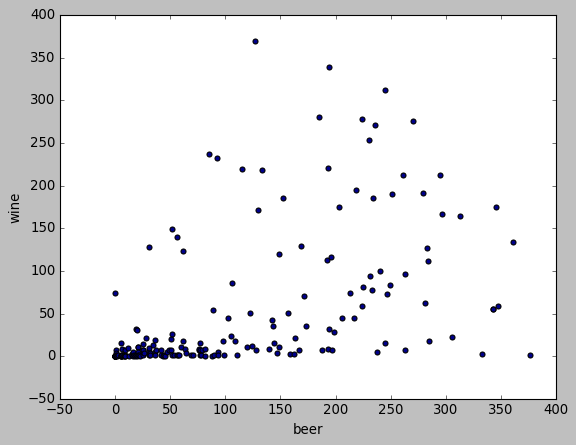

In [91]:
# Compare with scatter plot.
#drinks.sort_values('beer').plot.scatter(x='beer', y='wine', c='DarkBlue');
# SAME AS:
drinks[['beer', 'wine']].sort_values('beer').plot(x='beer', y='wine', kind='scatter', c='DarkBlue');

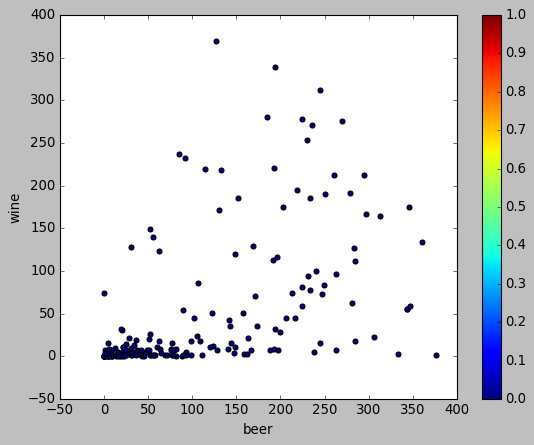

In [97]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!)..
drinks.plot(x='beer', y='wine', kind='scatter', c='DarkBlue', colorbar=True);

In [ ]:
# Vary point color by spirit servings.


In [ ]:
# Scatter matrix of three numerical columns


### Plotting `DataFrames`

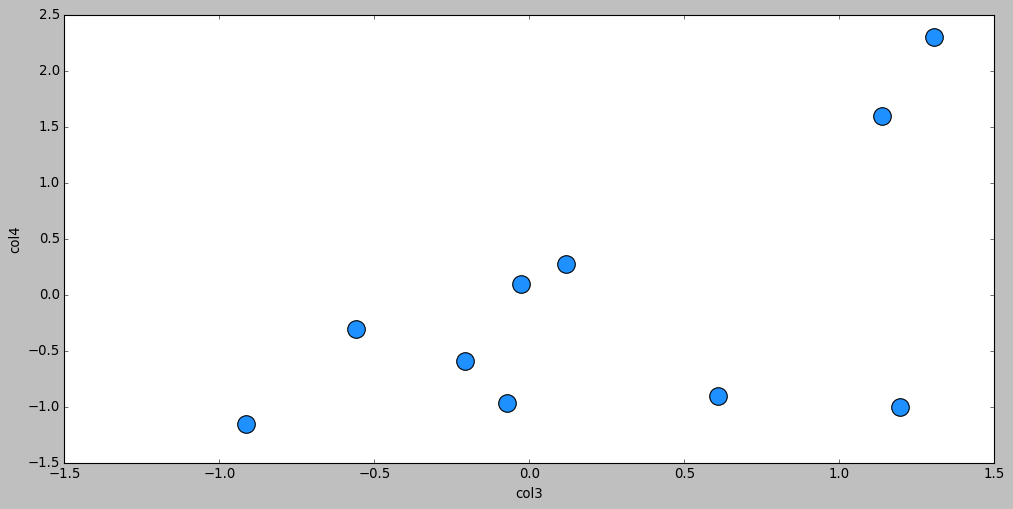

In [93]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue', figsize=(15,7), s=250);

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot

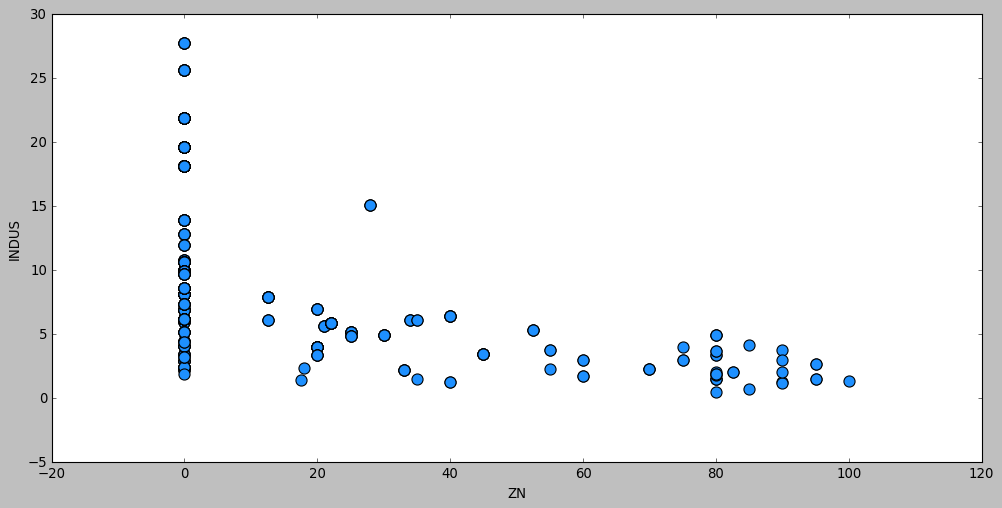

In [94]:
housing.plot(x='ZN', y='INDUS', kind='scatter', color='dodgerblue', figsize=(15,7), s=100);

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

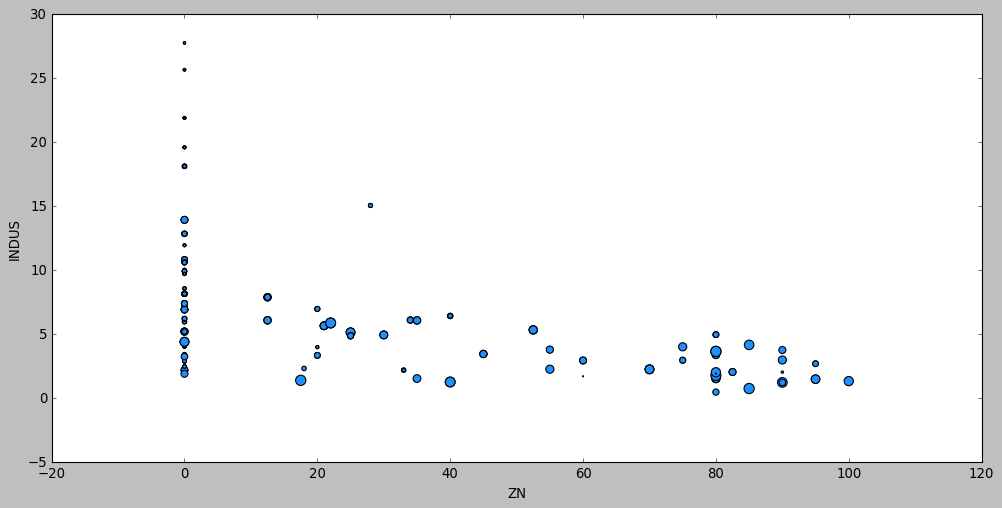

In [95]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', color='dodgerblue', figsize=(15,7), s=[x**2 for x in housing['DIS']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

In [ ]:
# Make a heatmap on the correlations between variables in the housing data:


### Challenge: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

Within this canvas, we can contain smaller objects called axes.

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

## Let's use a bit more customization.
---

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

In [ ]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [ ]:
# List available plot styles
plt.style.available

In [ ]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works